In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

zip_path = '/content/drive/MyDrive/Colab Notebooks/New.zip'
extract_path = '/content/drive/MyDrive/Colab Notebooks/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [5]:
# Define paths
train_dir = '/content/drive/MyDrive/Colab Notebooks/New/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/New/test/'

# ImageDataGenerator for loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15)  # Using 20% of the data for validation

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 2040 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
from tensorflow.keras.optimizers import Adam
# Define the optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 10501

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/63 ━━━━━━━━━━━━━━━━━━━━ 21:02 20s/step - accuracy: 0.5625 - loss: 0.8406

I0000 00:00:1721896694.179073      91 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721896694.233990      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


29/63 ━━━━━━━━━━━━━━━━━━━━ 17s 526ms/step - accuracy: 0.5063 - loss: 0.9608

W0000 00:00:1721896708.872679      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5061 - loss: 0.8939

W0000 00:00:1721896722.713466      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 497ms/step - accuracy: 0.5064 - loss: 0.8924 - val_accuracy: 0.5312 - val_loss: 0.7205
Epoch 2/10
 1/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5000 - loss: 0.7167

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5000 - loss: 0.7167 - val_accuracy: 0.5000 - val_loss: 0.6632
Epoch 3/10


W0000 00:00:1721896729.868604      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.5725 - loss: 0.6845 - val_accuracy: 0.4261 - val_loss: 0.7150
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7188 - loss: 0.6315 - val_accuracy: 0.6250 - val_loss: 0.6344
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - accuracy: 0.5800 - loss: 0.6855 - val_accuracy: 0.4403 - val_loss: 0.7770
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.4062 - loss: 0.8087 - val_accuracy: 0.8750 - val_loss: 0.4724
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - accuracy: 0.5760 - loss: 0.6714 - val_accuracy: 0.4432 - val_loss: 0.7278
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.4375 - loss: 0.7428 - val_accuracy: 0.5000 - val_loss: 0.6575
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.5984 - loss: 0.6531 - val_accuracy: 0.4943 - val_loss: 0.7446
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.5000 - loss: 0.6814 - val_accuracy: 0.7500 -

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

Output hidden; open in https://colab.research.google.com to view.

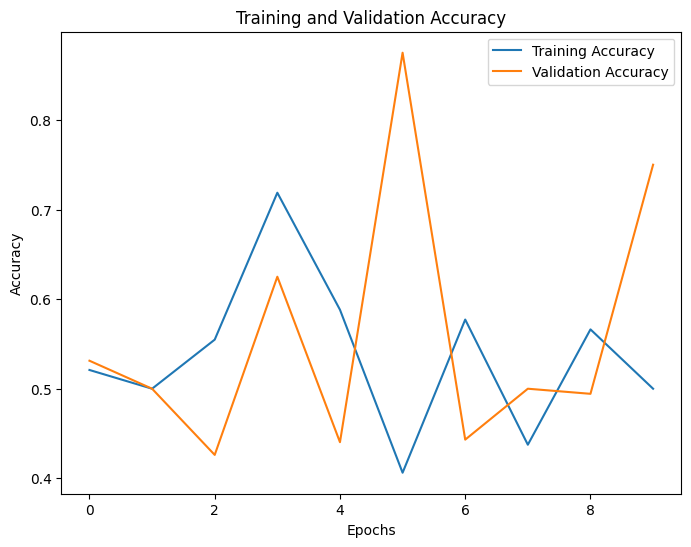

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/19 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step

W0000 00:00:1721896794.622526      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 631ms/step


W0000 00:00:1721896805.980213      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Accuracy: 0.5267
Precision: 1.0000
Recall: 0.0533
F1-score: 0.1013
Confusion Matrix
[[300   0]
 [284  16]]
Classification Report
              precision    recall  f1-score   support

  NoActivity       0.51      1.00      0.68       300
 YesActivity       1.00      0.05      0.10       300

    accuracy                           0.53       600
   macro avg       0.76      0.53      0.39       600
weighted avg       0.76      0.53      0.39       600



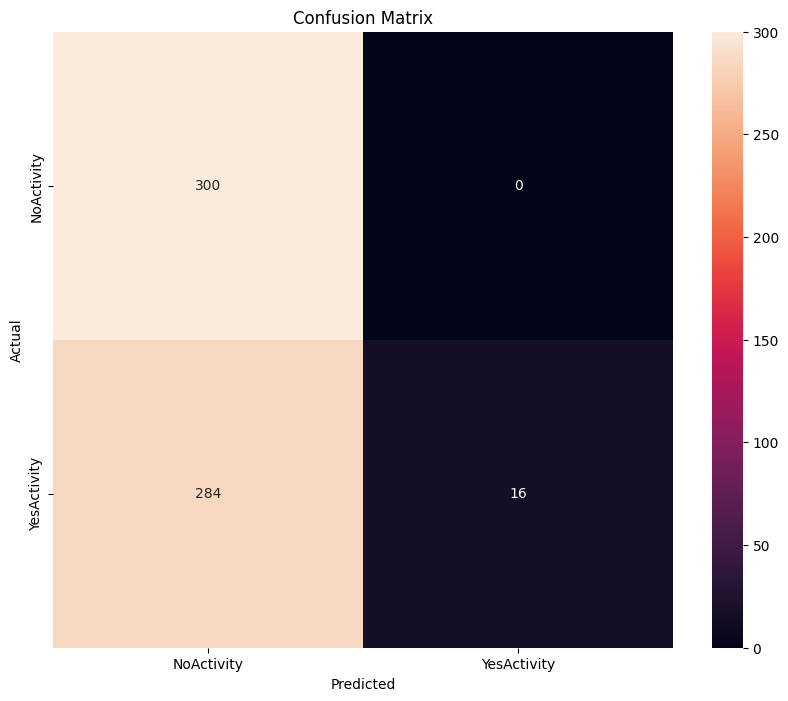

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)



accuracy = accuracy_score(test_generator.classes, y_pred)
precision = precision_score(test_generator.classes, y_pred)
recall = recall_score(test_generator.classes, y_pred)
f1 = f1_score(test_generator.classes, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
cm_plot_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()